# Proyecto Semestral 2025-2 - Gestión de Datos (IN1232C)

Estudiantes: Álvaro Molina Jara, Maicol Ramírez Mariño, Vicente Lillo Gallegos

## ETAPA 3: Visualizaciones avanzadas
Rango temporal: 2 años de datos (Enero–Diciembre de 2020-2021)

### Carga de los 2 años de DataFrames y unión

In [1]:
import os
import requests
import pandas as pd
import numpy as np
from io import StringIO

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
dfs = []
failed_files = []

año_inicio = 2020
año_fin = 2021

for year in range(año_inicio, año_fin + 1):
    year_str = str(year).zfill(4)

    for month in range(1, 13):
        month_str = str(str(month)).zfill(2)

        for day in range(1, 32):
            day_str = str(day).zfill(2)
            file_name = f"{month_str}-{day_str}-{year_str}.csv"
            file_url = f"{base_url}{file_name}"

            try:
                response = requests.get(file_url)
                response.raise_for_status()
                df = pd.read_csv(StringIO(response.text))
                df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex = True)
                df.columns = df.columns.str.lower()
                column_renames = {
                    'lastupdate': 'last_update',
                    'observationdate': 'last_update',
                    'latitude': 'lat',
                    'longitude': 'long_',
                    'confirmedcases': 'confirmed',
                    'case-fatality_ratio': 'case_fatality_ratio',
                    'casefatality_ratio': 'case_fatality_ratio',
                    'provincestate': 'province_state',
                    'countryregion': 'country_region',
                    'incidence_rate': 'incident_rate'
                }
                df = df.rename(columns = column_renames)

                required_cols = ['last_update', 'confirmed', 'deaths', 'recovered', 'country_region', 'province_state']
                for col in required_cols:
                    if col not in df.columns:
                        df[col] = pd.NA

                df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')
                df.dropna(subset = ['last_update'], inplace = True)
                dfs.append(df)
                print(f"Se cargó exitosamente {file_name}")

            except requests.exceptions.RequestException as e:
                print(f"No se pudo cargar {file_name}: {e}")
                failed_files.append(file_name)
            except Exception as e:
                print(f"Ocurrió un error inesperado al intentar procesar {file_name}: {e}")
                failed_files.append(file_name)

if dfs:
    combined_df = pd.concat(dfs, ignore_index = True)
else:
    print("No se cargaron DataFrames.")

if failed_files:
    print("\nArchivos que no se pudieron cargar:")
    for file in failed_files:
        print(file)

if 'combined_df' in locals() and not combined_df.empty:
    output_filename = 'covid_2020_2021.csv'
    combined_df.to_csv(output_filename, index = False)
    print(f"\nDataFrame guardado como '{output_filename}'")
    file_size_mb = os.path.getsize(output_filename) / (1024 * 1024)
    print(f"Tamaño del archivo: {file_size_mb:.2f} MB")
else:
    print("\nNo hay un DataFrame combinado para guardar.")

No se pudo cargar 01-01-2020.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2020.csv
No se pudo cargar 01-02-2020.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-02-2020.csv
No se pudo cargar 01-03-2020.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-03-2020.csv
No se pudo cargar 01-04-2020.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-04-2020.csv
No se pudo cargar 01-05-2020.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-05-2020.csv
No se pudo

/tmp/ipython-input-2796808279.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 03-22-2020.csv
Se cargó exitosamente 03-23-2020.csv
Se cargó exitosamente 03-24-2020.csv
Se cargó exitosamente 03-25-2020.csv
Se cargó exitosamente 03-26-2020.csv
Se cargó exitosamente 03-27-2020.csv


/tmp/ipython-input-2796808279.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 03-28-2020.csv


/tmp/ipython-input-2796808279.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 03-29-2020.csv


/tmp/ipython-input-2796808279.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 03-30-2020.csv
Se cargó exitosamente 03-31-2020.csv
Se cargó exitosamente 04-01-2020.csv


/tmp/ipython-input-2796808279.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 04-02-2020.csv
Se cargó exitosamente 04-03-2020.csv


/tmp/ipython-input-2796808279.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 04-04-2020.csv
Se cargó exitosamente 04-05-2020.csv


/tmp/ipython-input-2796808279.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 04-06-2020.csv
Se cargó exitosamente 04-07-2020.csv
Se cargó exitosamente 04-08-2020.csv
Se cargó exitosamente 04-09-2020.csv
Se cargó exitosamente 04-10-2020.csv
Se cargó exitosamente 04-11-2020.csv
Se cargó exitosamente 04-12-2020.csv
Se cargó exitosamente 04-13-2020.csv
Se cargó exitosamente 04-14-2020.csv
Se cargó exitosamente 04-15-2020.csv
Se cargó exitosamente 04-16-2020.csv
Se cargó exitosamente 04-17-2020.csv
Se cargó exitosamente 04-18-2020.csv
Se cargó exitosamente 04-19-2020.csv
Se cargó exitosamente 04-20-2020.csv
Se cargó exitosamente 04-21-2020.csv
Se cargó exitosamente 04-22-2020.csv
Se cargó exitosamente 04-23-2020.csv
Se cargó exitosamente 04-24-2020.csv
Se cargó exitosamente 04-25-2020.csv
Se cargó exitosamente 04-26-2020.csv
Se cargó exitosamente 04-27-2020.csv
Se cargó exitosamente 04-28-2020.csv
Se cargó exitosamente 04-29-2020.csv
Se cargó exitosamente 04-30-2020.csv
No se pudo cargar 04-31-2020.csv: 404 Client Error: Not Found for url: http

In [2]:
combined_df

,province_state,country_region,last_update,confirmed,deaths,recovered,lat,long_,fips,admin2,active,combined_key,incident_rate,case_fatality_ratio
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548503,Unknown,Ukraine,2022-01-01 04:22:14,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,"Unknown, Ukraine",0.0,0.0
2548504,NaN,Nauru,2022-01-01 04:22:14,0.0,0.0,0.0,-0.5228,166.9315,NaN,NaN,0.0,Nauru,0.0,0.0
2548505,Niue,New Zealand,2022-01-01 04:22:14,0.0,0.0,0.0,-19.0544,-169.8672,NaN,NaN,0.0,"Niue, New Zealand",0.0,0.0
2548506,NaN,Tuvalu,2022-01-01 04:22:14,0.0,0.0,0.0,-7.1095,177.6493,NaN,NaN,0.0,Tuvalu,0.0,0.0


### Limpieza del DF

In [4]:
combined_df.drop(['admin2', 'combined_key', 'fips', 'lat', 'long_'], axis = 1, inplace = True)
combined_df['last_update'] = pd.to_datetime(combined_df['last_update'], errors = 'coerce')
combined_df['last_update'] = combined_df['last_update'].dt.strftime('%Y-%m-%d')
combined_df['country_region'] = combined_df['country_region'].replace('US', 'United States')
combined_df['active_cases'] = combined_df['confirmed'] - combined_df['deaths'] - combined_df['recovered']
combined_df.drop(['active'], axis = 1, inplace = True)

In [5]:
print("Primeras 5 filas antes de limpiar los valores NaN:")
display(combined_df.head())

print("\nRecuento de valores NaN por columna antes de la limpieza:")
print(combined_df[['country_region', 'province_state', 'confirmed', 'deaths', 'recovered', 'active_cases', 'incident_rate', 'case_fatality_ratio']].isnull().sum())

combined_df['country_region'] = combined_df['country_region'].fillna('Unknown')
combined_df['province_state'] = combined_df['province_state'].fillna('Unknown')
combined_df['confirmed'] = combined_df['confirmed'].fillna(0)
combined_df['deaths'] = combined_df['deaths'].fillna(0)
combined_df['recovered'] = combined_df['recovered'].fillna(0)
combined_df['active_cases'] = combined_df['active_cases'].fillna(0)
combined_df['incident_rate'] = combined_df['incident_rate'].fillna(0)
combined_df['case_fatality_ratio'] = combined_df['case_fatality_ratio'].fillna(0)

print("\nRecuento de valores NaN por columna después de la limpieza:")
print(combined_df[['country_region', 'province_state', 'confirmed', 'deaths', 'recovered', 'active_cases', 'incident_rate', 'case_fatality_ratio']].isnull().sum())

print("\nPrimeras 5 filas después de limpiar los valores NaN:")
display(combined_df.head())

Primeras 5 filas antes de limpiar los valores NaN:


,province_state,country_region,last_update,confirmed,deaths,recovered,incident_rate,case_fatality_ratio,active_cases
0,Anhui,Mainland China,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,2020-01-22,14.0,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,2020-01-22,6.0,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN



Recuento de valores NaN por columna antes de la limpieza:
country_region               0
province_state          120112
confirmed                   28
deaths                     433
recovered              1091032
active_cases           1091103
incident_rate           278317
case_fatality_ratio     255963
dtype: int64

Recuento de valores NaN por columna después de la limpieza:
country_region         0
province_state         0
confirmed              0
deaths                 0
recovered              0
active_cases           0
incident_rate          0
case_fatality_ratio    0
dtype: int64

Primeras 5 filas después de limpiar los valores NaN:


,province_state,country_region,last_update,confirmed,deaths,recovered,incident_rate,case_fatality_ratio,active_cases
0,Anhui,Mainland China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0
1,Beijing,Mainland China,2020-01-22,14.0,0.0,0.0,0.0,0.0,0.0
2,Chongqing,Mainland China,2020-01-22,6.0,0.0,0.0,0.0,0.0,0.0
3,Fujian,Mainland China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0
4,Gansu,Mainland China,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
combined_df.drop_duplicates(inplace = True)

### 1. Evolución temporal global de casos confirmados, activos y fallecidos (gráfico de líneas)

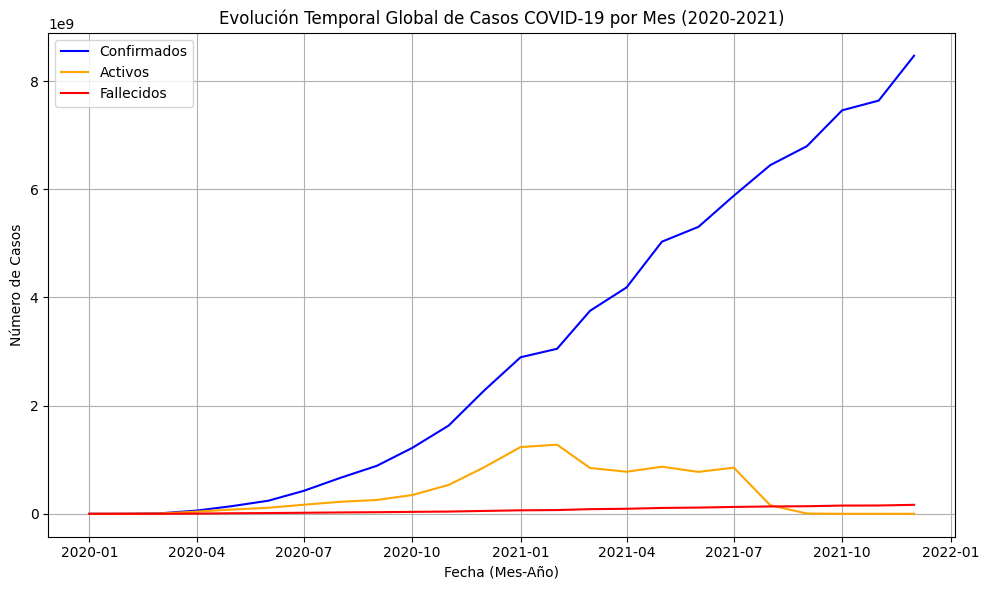

In [20]:
import matplotlib.pyplot as plt

combined_df['last_update'] = pd.to_datetime(combined_df['last_update'])
combined_df['month'] = combined_df['last_update'].dt.to_period('M')

casos_por_mes = combined_df.groupby('month').agg({
    'confirmed': 'sum',
    'active_cases': 'sum',
    'deaths': 'sum'
}).reset_index()

casos_por_mes['month'] = casos_por_mes['month'].dt.to_timestamp()
casos_por_mes = casos_por_mes[casos_por_mes['month'] <= '2021-12-31']

plt.figure(figsize = (10, 6))
plt.plot(casos_por_mes['month'], casos_por_mes['confirmed'], label = 'Confirmados', color = 'blue')
plt.plot(casos_por_mes['month'], casos_por_mes['active_cases'], label = 'Activos', color = 'orange')
plt.plot(casos_por_mes['month'], casos_por_mes['deaths'], label = 'Fallecidos', color = 'red')

plt.title('Evolución Temporal Global de Casos COVID-19 por Mes (2020-2021)')
plt.xlabel('Fecha (Mes-Año)')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico muestra cómo el número de casos confirmados se incrementó exponencialmente, con picos relevantes en la segunda mitad de 2021. Los casos activos y fallecidos también presentan tendencias claras y sincronizadas respecto a los períodos críticos de la pandemia.​

### 2. Comparativa Top 10 países con más casos confirmados (gráfico de barras)

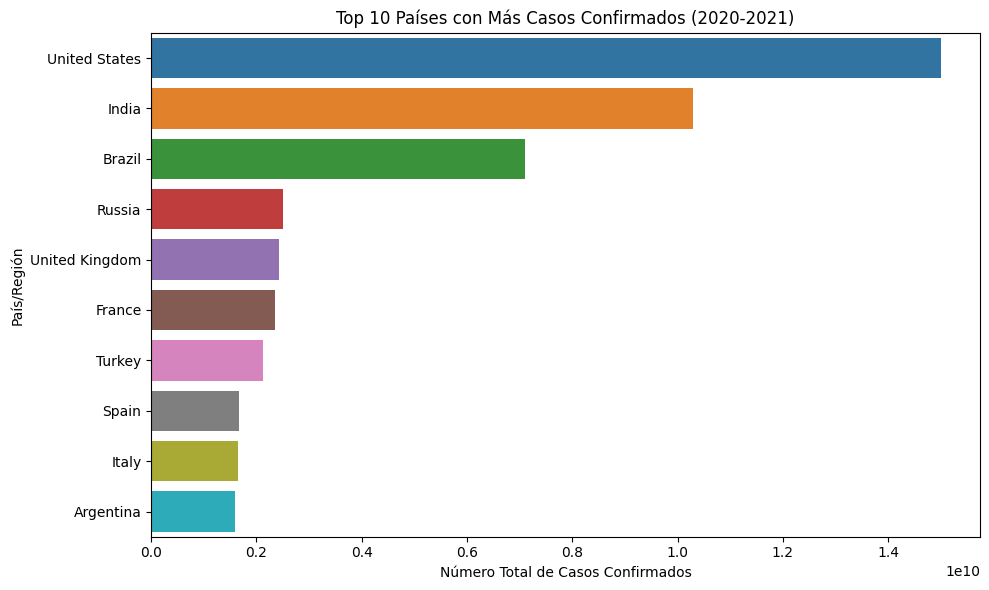

In [21]:
import seaborn as sns

casos_confirmados_por_pais = combined_df.groupby('country_region')['confirmed'].sum().reset_index()
top_10_paises = casos_confirmados_por_pais.nlargest(10, 'confirmed')

plt.figure(figsize = (10, 6))
sns.barplot(x = 'confirmed', y = 'country_region', data = top_10_paises, hue = 'country_region', legend = False)
plt.title('Top 10 Países con Más Casos Confirmados (2020-2021)')
plt.xlabel('Número Total de Casos Confirmados')
plt.ylabel('País/Región')
plt.tight_layout()
plt.show()

Este gráfico evidencia que Estados Unidos, India y Brasil fueron los países más afectados por el COVID-19, liderando el ranking global en número de casos confirmados.

### 3. Heatmap de correlaciones entre columnas relevantes (confirmados, fallecidos, activos, ratio)

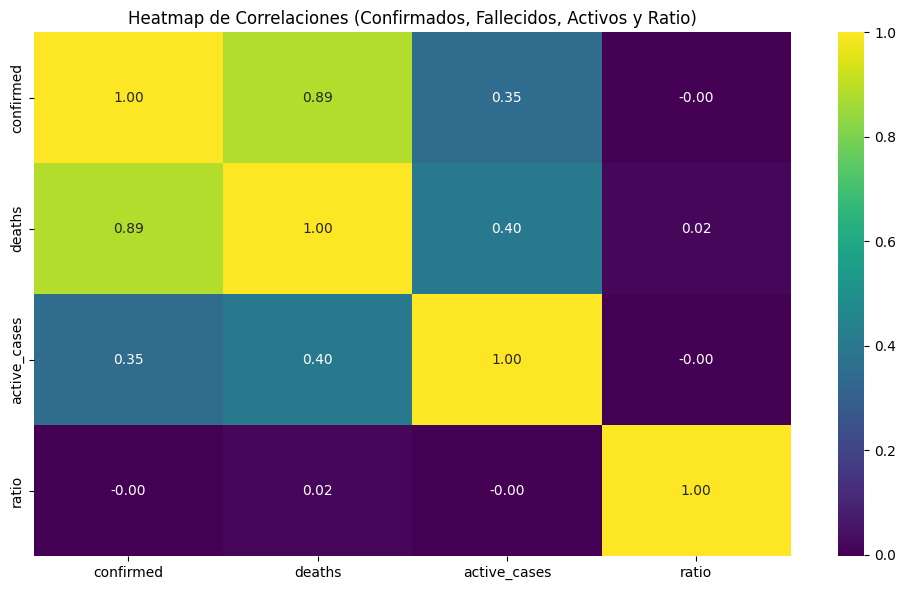

In [22]:
cols = ['confirmed', 'deaths', 'active_cases']

for c in cols:
    combined_df[c] = pd.to_numeric(combined_df[c], errors = 'coerce')

combined_df['ratio'] = combined_df['deaths'].div(combined_df['confirmed'].replace(0, np.nan))
cols.append('ratio')

df_corr = combined_df[cols].dropna()
corr_matrix = df_corr.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = "viridis", fmt = ".2f")

plt.title("Heatmap de Correlaciones (Confirmados, Fallecidos, Activos y Ratio)")
plt.tight_layout()
plt.show()

El heatmap de correlaciones muestra, por ejemplo, que existe una relación positiva alta (≈0,89) entre casos confirmados y fallecidos, respaldando que los focos de mayor contagio suelen estar acompañados por mayores cifras de mortalidad.

### 4. Gráfico de barras horizontales comparando tasas de letalidad por continente

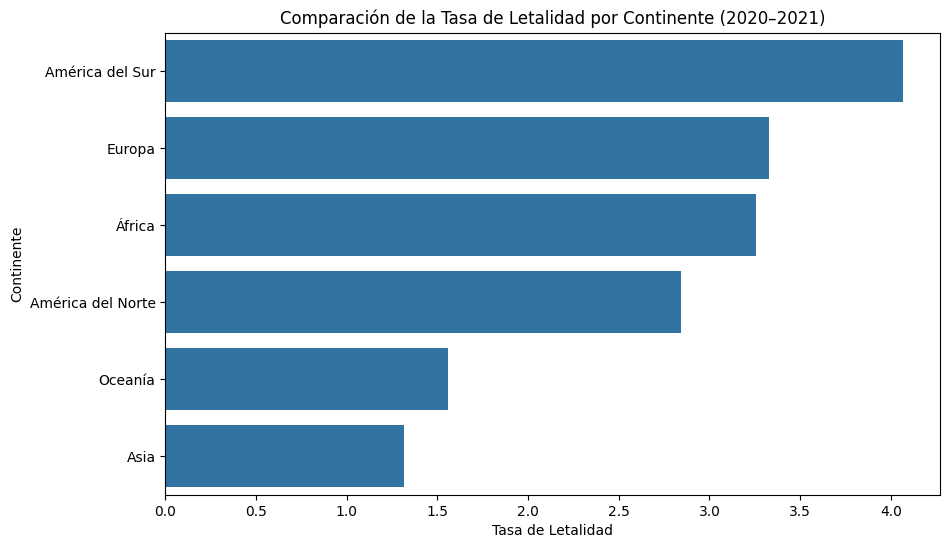

In [23]:
combined_df['tasa_letalidad'] = (combined_df['deaths'] / combined_df['confirmed'].replace(0, np.nan)) * 100

continentes = {
    "United States": "América del Norte",
    "Canada": "América del Norte",
    "Mexico": "América del Norte",
    "Brazil": "América del Sur",
    "Argentina": "América del Sur",
    "Chile": "América del Sur",
    "Peru": "América del Sur",
    "Colombia": "América del Sur",
    "China": "Asia",
    "India": "Asia",
    "Japan": "Asia",
    "South Korea": "Asia",
    "Italy": "Europa",
    "Spain": "Europa",
    "France": "Europa",
    "Germany": "Europa",
    "United Kingdom": "Europa",
    "South Africa": "África",
    "Egypt": "África",
    "Nigeria": "África",
    "Australia": "Oceanía",
    "New Zealand": "Oceanía",
}

combined_df["continente"] = combined_df["country_region"].map(continentes)
df_continente = combined_df.groupby("continente")["tasa_letalidad"].mean().sort_values(ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(x = df_continente.values, y = df_continente.index)

plt.xlabel("Tasa de Letalidad")
plt.ylabel("Continente")
plt.title("Comparación de la Tasa de Letalidad por Continente (2020–2021)")
plt.show()

La comparación de tasas de letalidad por continente permitió observar que América del Sur, Europa y África presentaron tasas proporcionalmente superiores respecto a Oceanía y Asia, lo que sugiere diferentes impactos sanitarios y sociales entre regiones.

### 5. Mapa o gráfico geográfico que muestre la incidencia por continente o país

In [24]:
import plotly.express as px

casos_por_pais_map = combined_df.groupby('country_region')['confirmed'].max().reset_index()

fig = px.choropleth(casos_por_pais_map,
                    locations = 'country_region',
                    locationmode = 'country names',
                    color = 'confirmed',
                    hover_name = 'country_region',
                    color_continuous_scale = px.colors.sequential.Plasma,
                    title = 'Incidencia Global de Casos Confirmados de COVID-19 (2020-2021)')
fig.show()

Este mapa geográfico de incidencia global resalta la distribución espacial de los casos confirmados, destacando la alta magnitud de contagios en América, Europa e India durante la pandemia.​

## Optimización del DF

### Tiempo de carga y uso de memoria del DF antes de las optimizaciones

Se miden los tiempos de carga y uso de memoria del DataFrame antes de aplicar cualquier optimización:

In [25]:
import time

start_time = time.time()
combined_df = pd.read_csv('covid_2020_2021.csv')
end_time = time.time()
loading_time = end_time - start_time
memory_usage_mb = combined_df.memory_usage(deep = True).sum() / (1024 * 1024)
print(f"Tiempo de carga del archivo: {loading_time:.2f} segundos")
print(f"Uso de memoria del DataFrame 'combined_df': {memory_usage_mb:.2f} MB")

Tiempo de carga del archivo: 8.22 segundos
Uso de memoria del DataFrame 'combined_df': 897.49 MB


In [26]:
print("\nUso de memoria por columna (antes de la optimización):")
print(combined_df.memory_usage(deep = True) / (1024 * 1024))


Uso de memoria por columna (antes de la optimización):
Index                    0.000126
province_state         136.841439
country_region         126.149536
last_update            165.270370
confirmed               19.443573
deaths                  19.443573
recovered               19.443573
lat                     19.443573
long_                   19.443573
fips                    19.443573
admin2                 125.858380
active                  19.443573
combined_key           168.376808
incident_rate           19.443573
case_fatality_ratio     19.443573
dtype: float64


### Optimización de carga del DF usand Dask en vez de Pandas


**Justificación**: Dask está especializado para manejar grandes conjuntos de datos (que incluso superan el tamaño de la memoria RAM), a diferencia de Pandas que solo es capaz de manejar conjuntos de datos pequeños y medianos menores al tamaño de la memoria RAM disponible.



In [27]:
import dask.dataframe as dd

file_path = 'covid_2020_2021.csv'

dtype_dict = {
    'province_state': 'object',
    'country_region': 'object',
    'last_update': 'object',
    'confirmed': 'float64',
    'deaths': 'float64',
    'recovered': 'float64',
    'lat': 'float64',
    'long_': 'float64',
    'fips': 'float64',
    'admin2': 'object',
    'active': 'float64',
    'combined_key': 'object',
    'incident_rate': 'float64',
    'case_fatality_ratio': 'float64'
}

print(f"Cargando '{file_path}' con Dask...")
start_time = time.time()
dask_df = dd.read_csv(file_path, dtype = dtype_dict, assume_missing = True)
end_time = time.time()
loading_time_dask = end_time - start_time
print(f"Tiempo de carga con Dask (solo metadatos): {loading_time_dask:.2f} segundos")

print("Persistiendo el DataFrame de Dask en memoria...")
start_time_persist = time.time()
dask_df_persisted = dask_df.persist()
_ = dask_df_persisted.head()
end_time_persist = time.time()
persist_time = end_time_persist - start_time_persist
print(f"Tiempo de persistencia de Dask: {persist_time:.2f} segundos")

print("\nEstructura del DataFrame de Dask:")
print(dask_df_persisted)
print(f"Número de particiones: {dask_df_persisted.npartitions}")

Cargando 'covid_2020_2021.csv' con Dask...
Tiempo de carga con Dask (solo metadatos): 0.06 segundos
Persistiendo el DataFrame de Dask en memoria...
Tiempo de persistencia de Dask: 11.98 segundos

Estructura del DataFrame de Dask:
Dask DataFrame Structure:
              province_state country_region last_update confirmed   deaths recovered      lat    long_     fips  admin2   active combined_key incident_rate case_fatality_ratio
npartitions=5                                                                                                                                                                  
                      string         string      string   float64  float64   float64  float64  float64  float64  string  float64       string       float64             float64
                         ...            ...         ...       ...      ...       ...      ...      ...      ...     ...      ...          ...           ...                 ...
...                      ...            

In [28]:
memory_usage_dask_mb = dask_df_persisted.memory_usage(deep = True).sum().compute() / (1024 * 1024)
print(f"Uso de memoria del DataFrame de Dask (persistente): {memory_usage_dask_mb:.2f} MB")

Uso de memoria del DataFrame de Dask (persisted): 409.48 MB


### Resumen de Optimización con Dask

#### Comparación de Tiempos de Carga:
*   **Pandas (carga completa):** `8.22 segundos`
*   **Dask (solo metadatos):** `0.06 segundos`
*   **Dask (persistencia y computación):** `11.98 segundos`

#### Comparación de Uso de Memoria:
*   **Pandas DataFrame:** `897.49 MB`
*   **Dask DataFrame (persistido):** `409.48 MB`

Se observa una reducción significativa en el uso de memoria del DataFrame de Dask persistido en comparación con el DataFrame de Pandas. Aunque el tiempo total para cargar y persistir el DataFrame de Dask es ligeramente mayor que el de Pandas para esta carga específica, Dask ofrece ventajas sustanciales para el procesamiento de datos que exceden la memoria disponible, gracias a su capacidad de operar de forma diferida y en paralelo. La carga inicial de metadatos con Dask es casi instantánea, lo que permite una manipulación rápida de la estructura del DataFrame.

### Optimización de tipos de datos

Se procede a convertir las columnas numéricas (`confirmed`, `deaths`, `recovered`, `active_cases`, `incident_rate`, `case_fatality_ratio`) a tipos de datos más eficientes en memoria (por ejemplo, `float32`, `int32`) y la columna `last_update` a un formato datetime optimizado:

In [29]:
optimized_dtypes = {
    'confirmed': 'float32',
    'deaths': 'float32',
    'recovered': 'float32',
    'lat': 'float32',
    'long_': 'float32',
    'fips': 'float32',
    'active': 'float32',
    'incident_rate': 'float32',
    'case_fatality_ratio': 'float32',
    'province_state': 'category',
    'country_region': 'category',
    'admin2': 'category',
    'combined_key': 'category'
}

dask_df_optimized = dask_df_persisted.astype({k: v for k, v in optimized_dtypes.items() if k in dask_df_persisted.columns})
dask_df_optimized['last_update'] = dd.to_datetime(dask_df_optimized['last_update'], errors = 'coerce')
print("Persistiendo el DataFrame de Dask optimizado en memoria...")
dask_df_optimized = dask_df_optimized.persist()
print("DataFrame de Dask optimizado y persistido.")
print("\nTipos de datos del DataFrame de Dask optimizado:")
print(dask_df_optimized.dtypes)
memory_usage_dask_optimized_mb = dask_df_optimized.memory_usage(deep=True).sum().compute() / (1024 * 1024)
print(f"\nUso de memoria del DataFrame de Dask optimizado: {memory_usage_dask_optimized_mb:.2f} MB")

Persistiendo el DataFrame de Dask optimizado en memoria...
DataFrame de Dask optimizado y persistido.

Tipos de datos del DataFrame de Dask optimizado:
province_state               category
country_region               category
last_update            datetime64[ns]
confirmed                     float32
deaths                        float32
recovered                     float32
lat                           float32
long_                         float32
fips                          float32
admin2                       category
active                        float32
combined_key                 category
incident_rate                 float32
case_fatality_ratio           float32
dtype: object

Uso de memoria del DataFrame de Dask optimizado: 128.21 MB


### Uso de índices para operaciones temporales


Se establece la columna 'last_update' como el índice del DataFrame (después de la conversión a datetime) para acelerar las operaciones basadas en tiempo, como filtrados y agrupaciones por rango de fechas:

In [30]:
print("Estableciendo 'last_update' como índice y persistiendo...")
dask_df_optimized = dask_df_optimized.set_index('last_update')
dask_df_optimized = dask_df_optimized.persist()

print("\nEstructura del DataFrame de Dask optimizado con índice de fecha:")
print(dask_df_optimized)

Estableciendo 'last_update' como índice y persistiendo...

Estructura del DataFrame de Dask optimizado con índice de fecha:
Dask DataFrame Structure:
                        province_state     country_region confirmed   deaths recovered      lat    long_     fips             admin2   active       combined_key incident_rate case_fatality_ratio
npartitions=5                                                                                                                                                                                     
2020-01-22 17:00:00  category[unknown]  category[unknown]   float32  float32   float32  float32  float32  float32  category[unknown]  float32  category[unknown]       float32             float32
2020-08-04 02:27:00                ...                ...       ...      ...       ...      ...      ...      ...                ...      ...                ...           ...                 ...
...                                ...                ...       ...   

### Conclusiones sobre mejoras de rendimiento después de las optimizaciones

**1. ¿Cuál era el rendimiento actual de la carga de "covid_2020_2021.csv" y el uso de memoria del DataFrame `combined_df` antes de las optimizaciones?**

Inicialmente, cargar `covid_2020_2021.csv` en un DataFrame de Pandas tardaba 8,22 segundos, y el `combined_df` consumía 897,49 MB de memoria. Las columnas `combined_key`, `last_update`, `province_state`, `country_region` y `admin2` eran las que más memoria consumían.

**2. ¿Cómo las optimizaciones de Dask y el tipo de datos mejoraron el rendimiento y el uso de la memoria?**

Con Dask, la carga inicial de metadatos fue muy rápida (0,06 segundos). La persistencia del DataFrame de Dask, que activa el cálculo, tardó 11,98 segundos, un poco más que la carga inicial de Pandas. Sin embargo, el DataFrame de Dask, antes de la optimización de tipos de datos, redujo el uso de memoria a 409,48 MB. Tras optimizar los tipos de datos (p. ej., `float32`, `category` y `datetime`), el consumo de memoria se redujo aún más, a 128,21 MB. Considerando las limitaciones de Google Colab en cuanto a uso de memoria con grandes conjuntos de datos, esta disminución del consumo de memoria es muy relevante.